In [2]:
from aide_design.play import*
from aide_design import floc_model as floc

#Below are the items that were imported by the code above so that you know what abbreviations to use in your code.

# Third-party imports
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib

# AIDE imports
#import aide_design
#import aide_design.pipedatabase as pipe
#from aide_design.units import unit_registry as u
#from aide_design import physchem as pc
#import aide_design.expert_inputs as exp
#import aide_design.materials_database as mat
#import aide_design.utility as ut
#import aide_design.k_value_of_reductions_utility as k
#import aide_design.pipeline_utility as pipeline
#import warnings

<div class="alert alert-block alert-info">

### When you finish the exam:  
Make sure to 'Restart and Run All' before you save for the final time to ensure your outputs show your latest work. Once you have done that, go to File -> Print Preview and **print the *webpage* as a pdf.** Email both the .ipynb and .pdf files to cee4540@gmail.com. 

### Name this file: Lastname_Firstname_Prelim1

# Multiple Choice (4 points each, 28 points total)
Make your answer **bold** by typing `**` before and after the correct answer.

1. Which collisions are thought to result in attachment? Bold all that result in attachment.
    1. **Humic acid to PACl nanoparticle**
    1. **Clay to PACl nanoparticle**
    1. Clay to Clay
    1. Humic acid to Clay
<br>
<br>
1. In a flow expansion the pressure
    1. Decreases in the direction of flow
    1. **Increases in the direction of flow**
<br>
<br>
1. Is the Moody diagram applicable for fluids other than water?
    1. No
    1. Yes, but only for other liquids (not gases)
    1. Yes, but only if they have the same viscosity as water
    1. **Yes** 
<br>
<br>
1. Which jet has the highest maximum energy dissipation rate assuming they all have the same flow velocity.
    1. **5 cm diameter jet**
    1. 10 cm diameter jet
    1. 20 cm diameter jet
<br>
<br>
1. Which one of the following types of head loss will increase the most (assuming flow velocity is held constant) as the temperature drops and the viscosity increases?
    1. turbulent flow major losses in rough pipes at high Reynolds numbers
    1. turbulent flow minor losses
    1. **laminar flow major losses**
<br>
<br>
1. Which equation could be used to calculate the head loss in a dosing tube?
    1. Bernoulli
    1. **Energy Equation (conservation of energy in a control volume)**
<br>
<br>
1. What **does a plant operator adjust** with the AguaClara Chemical Dose Controller to change the chemical dose to a plant?
    1. The float valve in the constant head tank
    1. The depth of the chemical in the stock tank
    1. **The location of the slider on the lever arm**
    1. The length of the dosing tubes
    1. The diameter of the dosing tubes

<div class="alert alert-block alert-info">

# Design Challenges (72 points)
Assign the given inputs to variables. Write the equation in python using variables. 

Print a full sentence to explain your result. For example, if you are asked to find the average energy dissipation in an in-line blender, your answer should be formatted as: "The average energy dissipation rate in the in-line blender is [insert answer here with appropriate units]". 

Make sure your answer is in appropriate units.

## 1. Rapid Mix (22 points)
A drinking water treatment plant operating at 100 L/s uses an in-line blender with a 5 hp motor for rapid mix. The residence time in the in-line blender is approximately 2 seconds. The water temperature is 5 $^{\circ}$C. You may assume that 70% of the motor horsepower is converted into fluid mixing. You may also assume that the turbulent energy is dissipated over the course of the 2-second residence time.

**A)** What is the average energy dissipation rate in the in-line blender? (5 points)  

In [3]:
flow_rapid_mix = 100*u.L/u.s
t_rapid_mix = 2*u.s
P_rapid_mix = 5*u.hp
Pi_efficiency = 0.7
T_rapid_mix = 5*u.degC
T_rapid_mix_warm = 25*u.degC
vol_rapid_mix = flow_rapid_mix*t_rapid_mix
EDR_rapid_mix = (P_rapid_mix*Pi_efficiency/(vol_rapid_mix*pc.density_water(T_rapid_mix))).to(u.W/u.kg)

print('A) The average energy dissipation rate in the in-line blender is',EDR_rapid_mix)

A) The average energy dissipation rate in the in-line blender is 13.05 watt / kilogram


**B)** What is the average velocity gradient (G) in the in-line blender? (4 points)  

In [4]:
G_rapid_mix = np.sqrt(EDR_rapid_mix/pc.viscosity_kinematic(T_rapid_mix)).to(u.Hz)
print('B) The average velocity gradient in the in-line blender is',G_rapid_mix)

B) The average velocity gradient in the in-line blender is 2948 hertz


**C)** What is the collision potential (Gt) for this in-line blender? (4 points)  

In [5]:
Gt_rapid_mix = (G_rapid_mix*t_rapid_mix).to(u.dimensionless)
print('C) The collision potential at 5°C the in-line blender is',Gt_rapid_mix)

C) The collision potential at 5°C the in-line blender is 5897 dimensionless


**D)** What is the collision potential (Gt) when the temperature increases to 25 $^{\circ}$C? (5 points)  


In [6]:
EDR_rapid_mix_warm = (P_rapid_mix*Pi_efficiency/(vol_rapid_mix*pc.density_water(T_rapid_mix_warm))).to(u.W/u.kg)
Gt_rapid_mix_warm = (np.sqrt(EDR_rapid_mix_warm/pc.viscosity_kinematic(T_rapid_mix_warm))*t_rapid_mix).to(u.dimensionless)
print('D) The collision potential at 25°C in the in-line blender is',Gt_rapid_mix_warm)

D) The collision potential at 25°C in the in-line blender is 7656 dimensionless


**E)** What is the equivalent potential energy expressed as a height for the mixing energy of this rapid mix unit? (4 points)  

In [7]:
DeltaH_rapid_mix = (P_rapid_mix*Pi_efficiency/flow_rapid_mix/pc.density_water(T_rapid_mix)/pc.gravity).to(u.m)
print('E) The equivalent potential energy expressed as a height for the mixing energy is',DeltaH_rapid_mix)

E) The equivalent potential energy expressed as a height for the mixing energy is 2.661 meter


## 2. Dosing tube head loss graph (15 points)
**A)** Plot the flow rate in a dosing tube as function of head loss. The maximum head loss is 20 cm. The dosing tube inner diameter is 1/8 inch, and its length is 1 m. The sum of the minor loss coefficients for the tube is 6. The fluid, dilute bleach, is at 20°C and has the same density and viscosity as water.  (10 points) 

**B)** Plot the ideal linear flow on the same graph with the assumption that the ideal linear flow is equal to the maximum observed flow at the maximum head loss.  (5 points) 

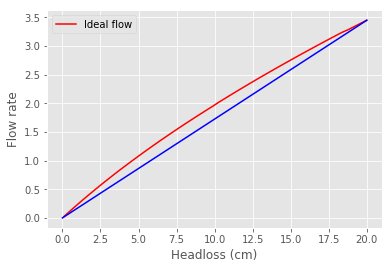

In [8]:
d_CDC_tube = 1/8*u.inch
L_tube = 1*u.m
T_design = 20*u.degC
Nu = pc.viscosity_kinematic(T_design)
pipe_rough = 0*u.mm    #this value does not matter. As a result of how aide_design is written is must be between 0 and 1 
                       #meter, but since the flow is laminar its value is irrelevant for this problem.
K_minor = 6

hl_tube_max = 20*u.cm

hl_tube = np.linspace(0.1,hl_tube_max)*u.cm

flow_tube = pc.flow_pipe(d_CDC_tube, hl_tube, L_tube, Nu, pipe_rough, K_minor)

plt.plot(hl_tube, flow_tube.to(u.mL/u.s), 'r-')
plt.xlabel('Headloss (cm)')
plt.ylabel('Flow rate')
plt.legend(['Ideal flow', 'Predicted flow'], loc='best')


#---------------------------------------------------------PART B-----------------------------------------------------------
flow_tube_max = pc.flow_pipe(d_CDC_tube, hl_tube_max, L_tube, Nu, pipe_rough, K_minor)

flow_tube_ideal = np.array([0,flow_tube_max.to(u.mL/u.s).magnitude])*u.mL/u.s
hl_tube_ideal = np.array([0, hl_tube_max.to(u.cm).magnitude])*u.cm

plt.plot(hl_tube_ideal.to(u.cm), flow_tube_ideal.to(u.mL/u.s), 'b-')
plt.show()

## 3. Hypochlorinator (hole in a bucket) flow rate (19 points)
A hypchlorinator using a valve to control the flow of chlorine from a rectangular tank is filled with chlorine solution at time zero. The tank is 0.5 m x 0.5 m in plan view. The depth of chlorine in the tank at time zero was 1 m. The chlorine solution exits through a pipe with a control valve and drips into a water distribution tank. The pipe exit to the atmosphere where the chlorine drips down to the distribution tank is 30 cm below the bottom of the chlorine tank. The flow of chlorine is set to be 0.5 mL/s at time zero using the control valve installed in the exit pipe.   

**A)** How long would it take to empty the tank ($t_{Design}$) **if the flow remained constant** at the initial flow rate? (5 points) 

In [9]:
area_plan_tank = (0.5*u.m)**2
H_tank = 1*u.m
flow_initial = 0.5*u.mL/u.s
vol_tank = area_plan_tank*H_tank
H_valve = 30*u.cm
H0 = H_tank + H_valve

t_design = vol_tank/flow_initial
print('A) If the flow remained at the initial setting, the tank would empty in',t_design.to(u.day))

A) If the flow remained at the initial setting, the tank would empty in 5.787 day


**B)** What will the flow of chlorine solution be in 3 days? For this question, **define a function** (5 points) with appropriate input parameters and then use that function to answer this question (4 points).

$\frac{Q}{Q_0} = 1 - \frac{1}{2}\frac{t}{t_{Design}}\frac{h_{Tank}}{h_0}$

Note: this is only part of the solution file and will not be given to students


In [10]:
def Q(Q0,t,t_design,H_tank,H0):
    Q=Q0*(1-1/2*t/t_design*H_tank/H0)
    return Q

Q_3_days=Q(flow_initial,3*u.day,t_design,H_tank,H0)
print('B) The flow at 3 days will be',Q_3_days)

B) The flow at 3 days will be 0.4003 milliliter / second


**C)** Use the fact that the flow rate is related to the height of water above the valve to calculate the flow rate at the moment before the tank empties (and you know what this relationship is!). (5 points) 

In [11]:
flow_final=flow_initial*np.sqrt(H_valve/H0)
print('C) The final flow will be',flow_final.to(u.mL/u.s))


C) The final flow will be 0.2402 milliliter / second


## 4. Gracias chemical dose controller float valve analysis (16 points)
The design for a new AguaClara plant for the colonial town of Gracias in Honduras is nearing completion. This is the largest plant that AguaClara has designed. The plant flow rate is set to be 120 L/s. The plant flow will be divided equally between 2 treatment trains. Each treatment train will have its own chemical dose controller (CDC).
The vena contracta for the CDC float valve orifice within the constant head tank is estimated to be 0.8 because the entrance to the 0.093 inch diameter orifice is nicely rounded. You may assume that the pipes that connect the coagulant stock tank to the float valve are sized to be large enough that they don't have any significant head loss. The height difference between the water level in the coagulant stock tank and the water level in the constant head tank is 30 cm when the stock tank is full.   


The PACl stock concentration is 160 g/L (as granular PACl). The maximum coagulant dose (as granular PACl) is expected to be 30 mg/L.

**A)** What is the maximum flow rate of PACl that will be needed for one of the 60 L/s treatment trains? (5 points)   

In [12]:
flow_Gracias = 60*u.L/u.s
conc_PACl_stock = 160*u.g/u.L
conc_PACl_dose_max = 30*u.mg/u.L
flow_PACl_max = flow_Gracias*conc_PACl_dose_max/conc_PACl_stock
print('A) The maximum coagulant flow needed is',flow_PACl_max.to(u.mL/u.s))


A) The maximum coagulant flow needed is 11.25 milliliter / second


**B)** What is the maximum flow rate of PACl that the float valve in the constant head tank can deliver? (5 points)   


In [13]:
delta_h_float_valve = 30*u.cm
d_float_valve_orifice = 0.093*u.inch
Pi_vena_contracta = 0.8
flow_orifice_max = Pi_vena_contracta*pc.area_circle(d_float_valve_orifice)*np.sqrt(2*pc.gravity*delta_h_float_valve)
print('B) The maximum flow through the float valve orifice is',flow_orifice_max.to(u.mL/u.s))

B) The maximum flow through the float valve orifice is 8.505 milliliter / second


**C)** Propose at least 3 options that would increase the maximum PACl flow through the CDC system. (6 points)     
**Your answers here:**

1. Use two constant head tanks to double the flow rate (note that there are already 2 constant head tanks available with one as backup).
1. Use a float valve with a larger diameter orifice (or modify the float valve by drilling out the orifice)
1. Increase the elevation of the stock tank
1. Increase the stock tank concentration